Saving cumulative_cost_M1_lin_beta_080_A1_10_10_years.npz to cumulative_cost_M1_lin_beta_080_A1_10_10_years (6).npz
Saving marginal_cost_M1_lin_beta_080_A1_10_10_years.npz to marginal_cost_M1_lin_beta_080_A1_10_10_years (6).npz
Saving I_M1_lin_beta_080_A1_10_10_years.npz to I_M1_lin_beta_080_A1_10_10_years (6).npz
Saving cumulative_cost_M1_quad_beta_080_A1_10_10_years.npz to cumulative_cost_M1_quad_beta_080_A1_10_10_years (6).npz
Saving marginal_cost_M1_quad_beta_080_A1_10_10_years.npz to marginal_cost_M1_quad_beta_080_A1_10_10_years (6).npz
Saving I_M1_quad_beta_080_A1_10_10_years.npz to I_M1_quad_beta_080_A1_10_10_years (6).npz
Saving cumulative_cost_M0_beta_080_A1_10_10_years.npz to cumulative_cost_M0_beta_080_A1_10_10_years (6).npz
Saving I_M0_beta_080_A1_10_10_years.npz to I_M0_beta_080_A1_10_10_years (6).npz
Saving marginal_cost_M0_beta_080_A1_10_10_years.npz to marginal_cost_M0_beta_080_A1_10_10_years (6).npz
none - linear (infections) first drops below 0 at t = 9.84 years.
none

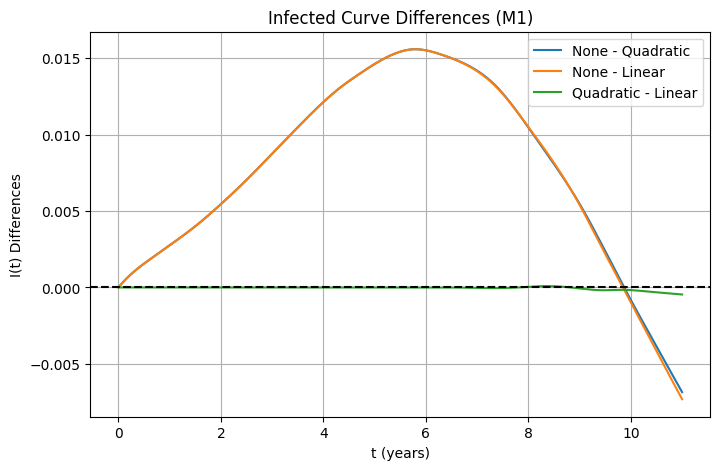

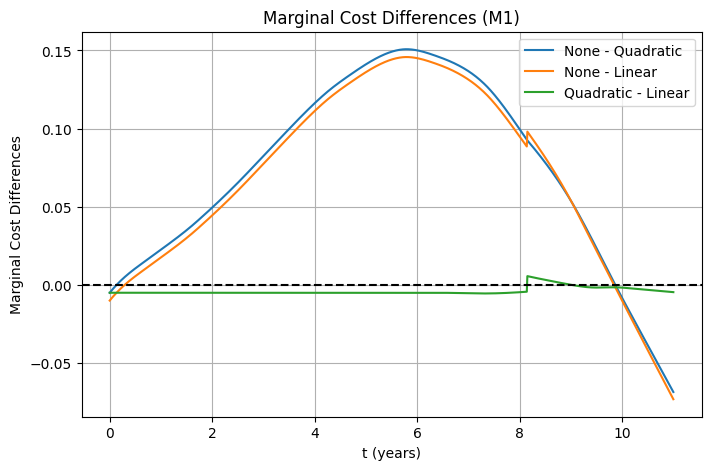

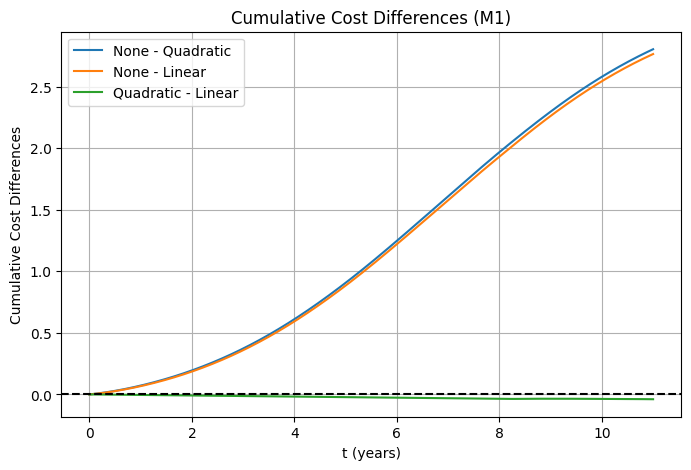

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload .npz arrays
uploaded = files.upload()
I_none = np.load("I_M0_beta_080_A1_10_10_years.npz")
I_quad = np.load("I_M1_quad_beta_080_A1_10_10_years.npz")
I_lin = np.load("I_M1_lin_beta_080_A1_10_10_years.npz")

marginal_cost_none = np.load("marginal_cost_M0_beta_080_A1_10_10_years.npz")
marginal_cost_quad = np.load("marginal_cost_M1_quad_beta_080_A1_10_10_years.npz")
marginal_cost_lin = np.load("marginal_cost_M1_lin_beta_080_A1_10_10_years.npz")

cumulative_cost_none = np.load("cumulative_cost_M0_beta_080_A1_10_10_years.npz")
cumulative_cost_quad = np.load("cumulative_cost_M1_quad_beta_080_A1_10_10_years.npz")
cumulative_cost_lin = np.load("cumulative_cost_M1_lin_beta_080_A1_10_10_years.npz")

t_none, I_none = I_none["t"], I_none["I"]
t_quad, I_quad = I_quad["t"], I_quad["I"]
t_lin, I_lin = I_lin["t"], I_lin["I"]

marginal_cost_none = marginal_cost_none["marginal_cost"]
marginal_cost_quad = marginal_cost_quad["marginal_cost"]
marginal_cost_lin = marginal_cost_lin["marginal_cost"]

cumulative_cost_none = cumulative_cost_none["cumulative_cost"]
cumulative_cost_quad = cumulative_cost_quad["cumulative_cost"]
cumulative_cost_lin = cumulative_cost_lin["cumulative_cost"]

# Find first time none - linear (infections) drops below 0
tol_difference = 1e-5
lin_diff = I_none - I_lin
indices_below = np.where(lin_diff < -tol_difference)[0]

if len(indices_below) > 0:
    idx = indices_below[0]
    t_before, t_after = t_none[idx-1], t_none[idx]
    diff_before, diff_after = lin_diff[idx-1], lin_diff[idx]
    t_cross = t_before + (-diff_before) * (t_after - t_before) / (diff_after - diff_before)
    print(f"none - linear (infections) first drops below 0 at t = {t_cross:.2f} years.")
else:
    print("none - linear (infections) never drops below 0 between 0 and 10 years.")

# Find first time none - quadratic (infections) drops below 0
tol_difference = 1e-5
quad_diff = I_none - I_quad
indices_below = np.where(quad_diff < -tol_difference)[0]

if len(indices_below) > 0:
    idx = indices_below[0]
    t_before, t_after = t_none[idx-1], t_none[idx]
    diff_before, diff_after = quad_diff[idx-1], quad_diff[idx]
    t_cross = t_before + (-diff_before) * (t_after - t_before) / (diff_after - diff_before)
    print(f"none - quadratic (infections) first drops below 0 at t = {t_cross:.2f} years.")
else:
    print("none - quadratic (infections) never drops below 0 between 0 and 10 years.")

# Find first time none - linear (marginal cost) drops below 0
tol_difference = 1e-5
start_idx = np.searchsorted(t_none, 1.0)
lin_diff = marginal_cost_none - marginal_cost_lin
lin_diff_slice = lin_diff[start_idx:]
t_slice = t_none[start_idx:]

indices_below = np.where(lin_diff_slice < -tol_difference)[0]

if len(indices_below) > 0:
    idx = indices_below[0]
    t_before, t_after = t_slice[idx-1], t_slice[idx]
    diff_before, diff_after = lin_diff_slice[idx-1], lin_diff_slice[idx]
    t_cross = t_before + (-diff_before) * (t_after - t_before) / (diff_after - diff_before)
    print(f"none - linear (marginal cost) first drops below 0 at t = {t_cross:.2f} years.")
else:
    print("none - linear (marginal cost) never drops below 0 between 0 and 10 years.")

# Find first time none - quadratic (marginal cost) drops below 0
tol_difference = 1e-5
start_idx = np.searchsorted(t_none, 1.0)
quad_diff = marginal_cost_none - marginal_cost_quad
quad_diff_slice = quad_diff[start_idx:]
t_slice = t_none[start_idx:]

indices_below = np.where(quad_diff_slice < -tol_difference)[0]

if len(indices_below) > 0:
    idx = indices_below[0]
    t_before, t_after = t_slice[idx-1], t_slice[idx]
    diff_before, diff_after = quad_diff_slice[idx-1], quad_diff_slice[idx]
    t_cross = t_before + (-diff_before) * (t_after - t_before) / (diff_after - diff_before)
    print(f"none - quadratic (marginal cost) first drops below 0 at t = {t_cross:.2f} years.")
else:
    print("none - quadratic (marginal cost) never drops below 0 between 0 and 10 years.")

# Plot infected differences
plt.figure(figsize=(8,5))
plt.plot(t_none, I_none - I_quad, label="None - Quadratic")
plt.plot(t_none, I_none - I_lin, label="None - Linear")
plt.plot(t_none, I_quad - I_lin, label="Quadratic - Linear")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("t (years)")
plt.ylabel("I(t) Differences")
plt.title("Infected Curve Differences (M1)")
plt.legend()
plt.grid(True)
plt.show()

# Plot marginal cost differences
plt.figure(figsize=(8,5))
plt.plot(t_none, marginal_cost_none - marginal_cost_quad, label="None - Quadratic")
plt.plot(t_none, marginal_cost_none - marginal_cost_lin, label="None - Linear")
plt.plot(t_none, marginal_cost_quad - marginal_cost_lin, label="Quadratic - Linear")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("t (years)")
plt.ylabel("Marginal Cost Differences")
plt.title("Marginal Cost Differences (M1)")
plt.legend()
plt.grid(True)
plt.show()

# Plot cumulative cost differences
plt.figure(figsize=(8,5))
plt.plot(t_none, cumulative_cost_none - cumulative_cost_quad, label="None - Quadratic")
plt.plot(t_none, cumulative_cost_none - cumulative_cost_lin, label="None - Linear")
plt.plot(t_none, cumulative_cost_quad - cumulative_cost_lin, label="Quadratic - Linear")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("t (years)")
plt.ylabel("Cumulative Cost Differences")
plt.title("Cumulative Cost Differences (M1)")
plt.legend()
plt.grid(True)
plt.show()